<a href="https://colab.research.google.com/github/FranItu/CODOJOTRACK1/blob/main/Proj2/P2_Francisco_Iturralde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 2: Análisis de Criptomonedas

## Resumen

En este proyecto, se utilizará la data de criptomonedas, analisis matematico y modelos de machine learning para intentar describir la estructura y generar un modelo de prediccion de movimiento y estabilidad de estas.

## Importaciones

### Librerias

In [ ]:
# Google Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Data Manip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as skmt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

### Bases De Datos

In [ ]:
#chosen datasets
dfaav = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Aave.csv')
dfbnb = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_BinanceCoin.csv')
dfbtc = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Bitcoin.csv')
dfada = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Cardano.csv')
dflin = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_ChainLink.csv')
dfcos = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Cosmos.csv')
dfcro = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_CryptocomCoin.csv')
dfdog = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Dogecoin.csv')
dfeos = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_EOS.csv')
dfeth = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Ethereum.csv')
dfxmr = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Monero.csv')
dfdot = pd.read_csv('/content/drive/My Drive/Coding_Dojo/Bases_De_Datos/P2/coin_Polkadot.csv')

In [ ]:
#list of dataframes
LDF = [dfaav, dfbnb, dfbtc, dfada, dflin, dfcos,
       dfcro, dfdog, dfeos, dfeth, dfxmr, dfdot]

In [ ]:
#GeneralDF
GDF = pd.concat(LDF)

In [ ]:
GDF['INC'] = GDF['High'] - GDF['Low']
#INC = amount increased

In [ ]:
def f(row):
    if row['Close'] - row['Open'] > 0:
        val = 'yes'
    else:
        val = 'no'
    return val

GDF['IM'] = GDF.apply(f, axis=1)
#IM = Increase Marker

In [ ]:
GDF.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,INC,IM
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07,5.324459,yes
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07,12.667692,no
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07,6.437624,no
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08,8.206454,yes
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08,4.277757,yes


## Análisis Exploratorio

In [ ]:
GroupDF = GDF.set_index('Date').groupby(['Name'])

Name
Aave               AxesSubplot(0.125,0.125;0.775x0.755)
Binance Coin       AxesSubplot(0.125,0.125;0.775x0.755)
Bitcoin            AxesSubplot(0.125,0.125;0.775x0.755)
Cardano            AxesSubplot(0.125,0.125;0.775x0.755)
Chainlink          AxesSubplot(0.125,0.125;0.775x0.755)
Cosmos             AxesSubplot(0.125,0.125;0.775x0.755)
Crypto.com Coin    AxesSubplot(0.125,0.125;0.775x0.755)
Dogecoin           AxesSubplot(0.125,0.125;0.775x0.755)
EOS                AxesSubplot(0.125,0.125;0.775x0.755)
Ethereum           AxesSubplot(0.125,0.125;0.775x0.755)
Monero             AxesSubplot(0.125,0.125;0.775x0.755)
Polkadot           AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

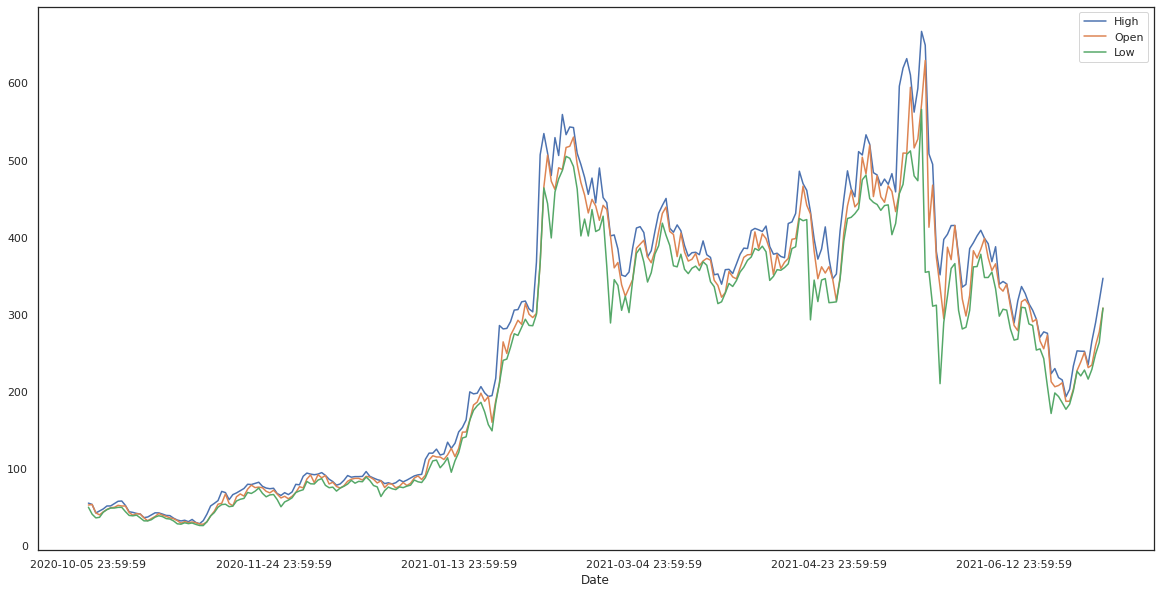

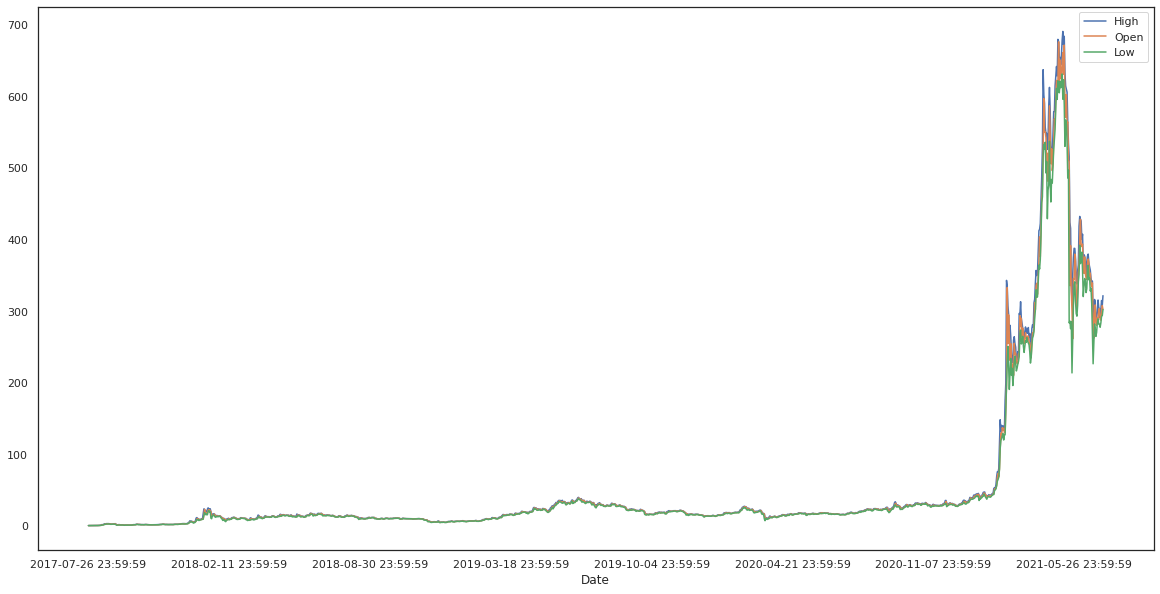

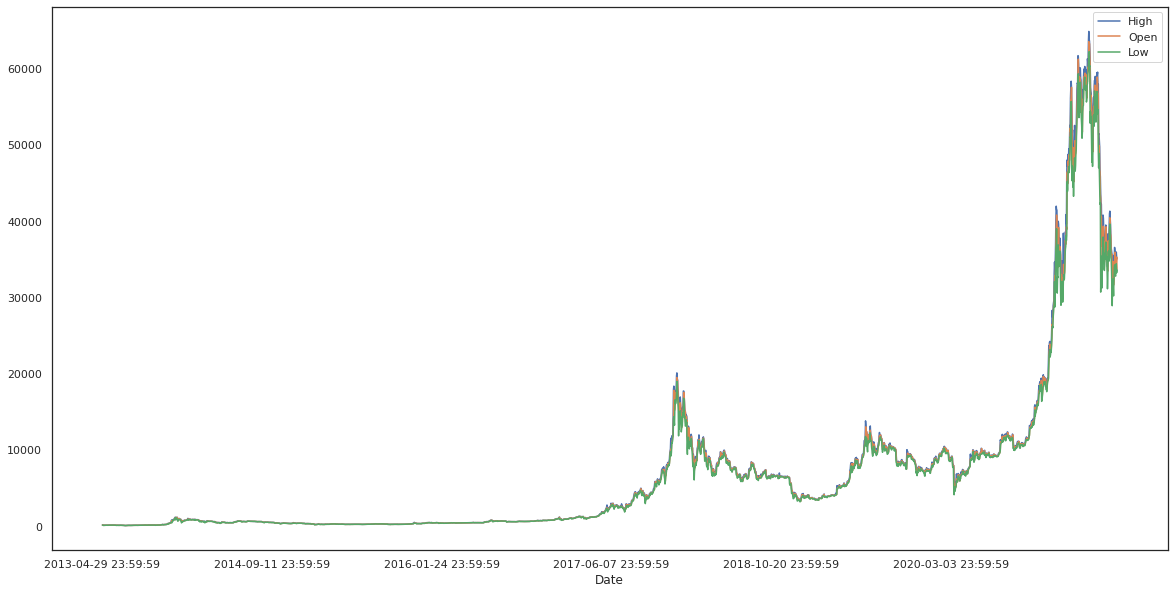

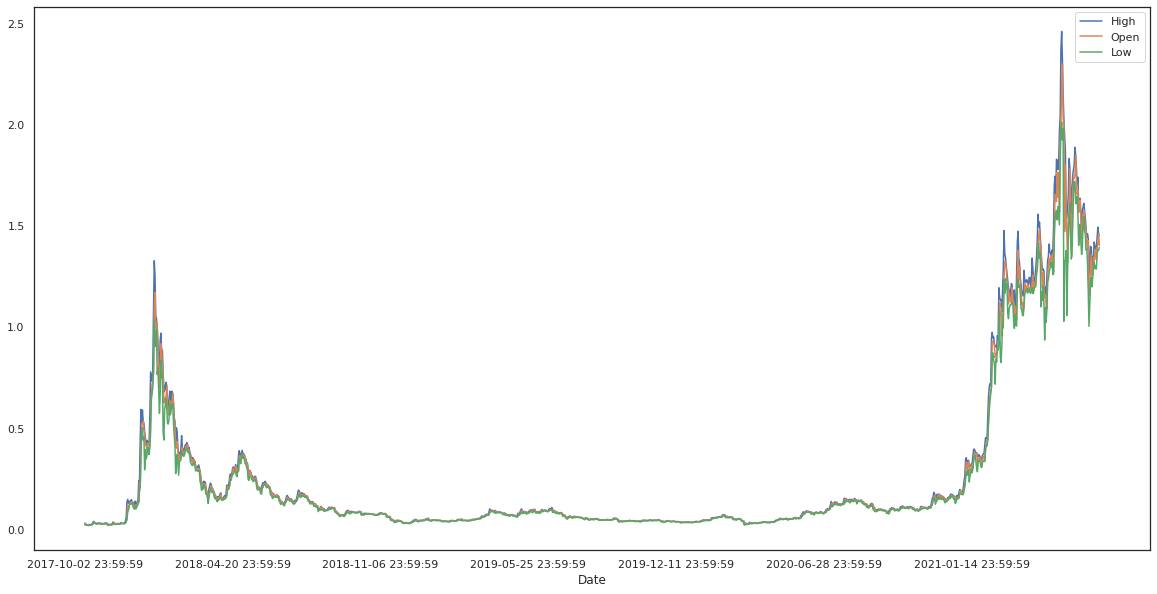

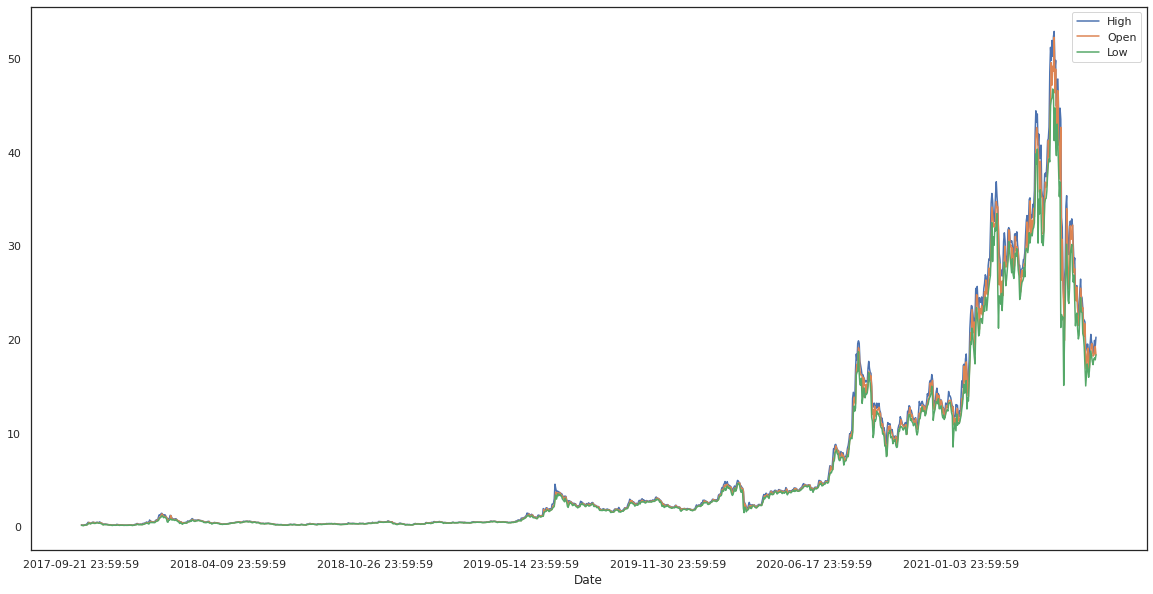

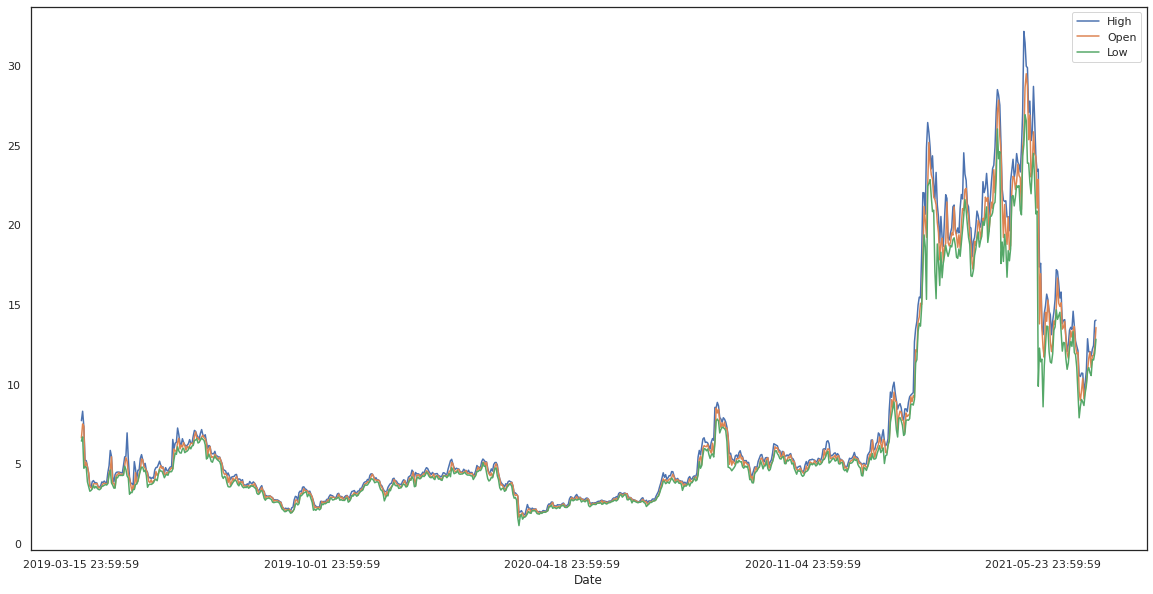

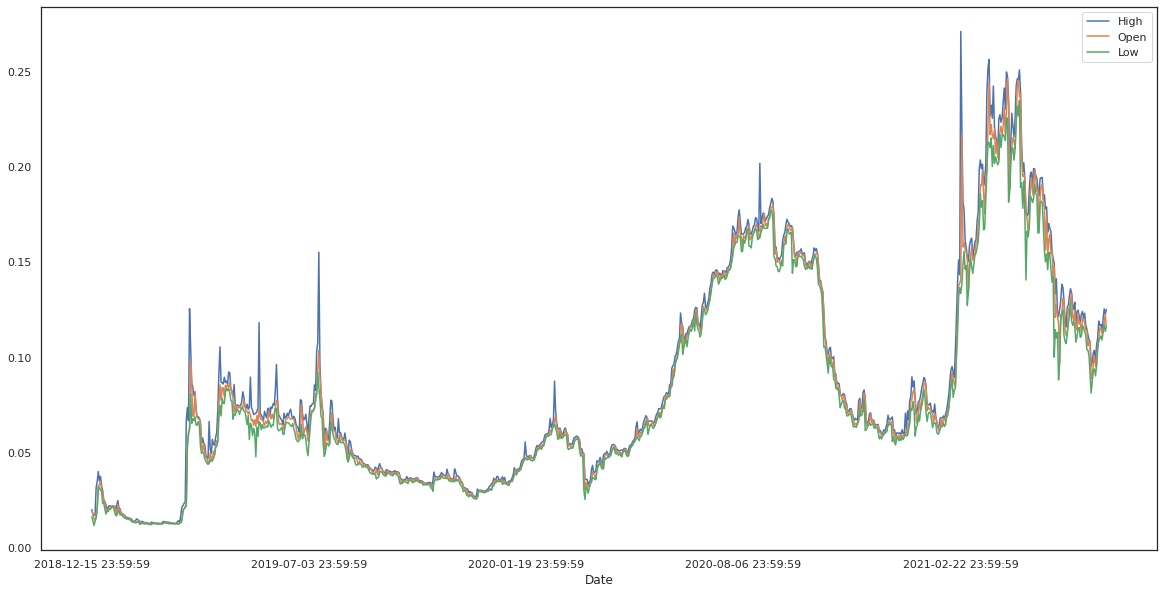

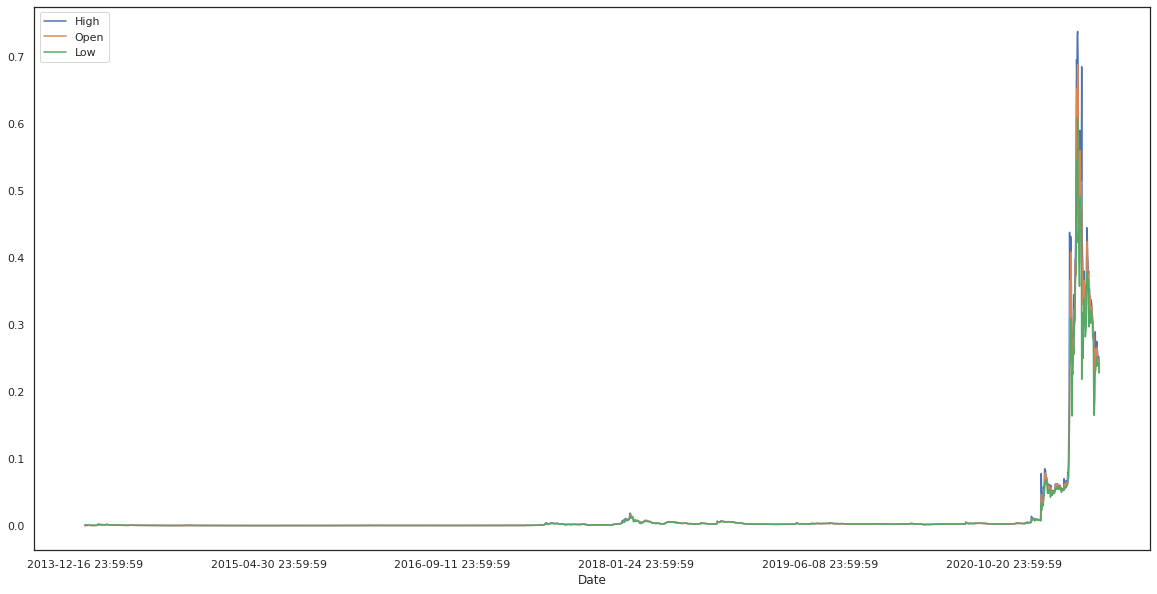

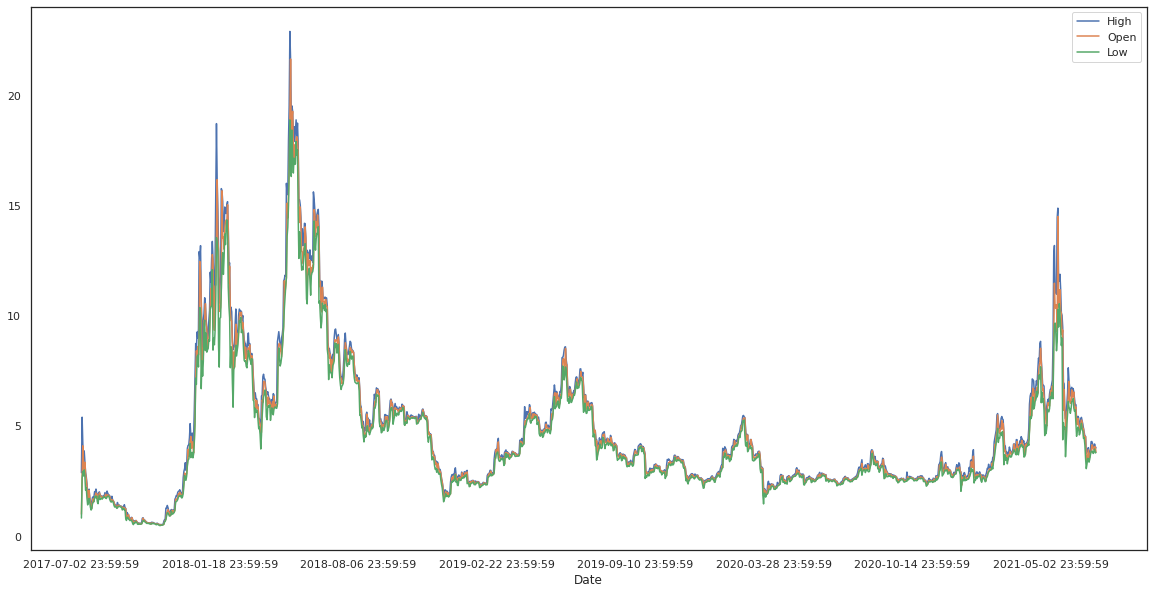

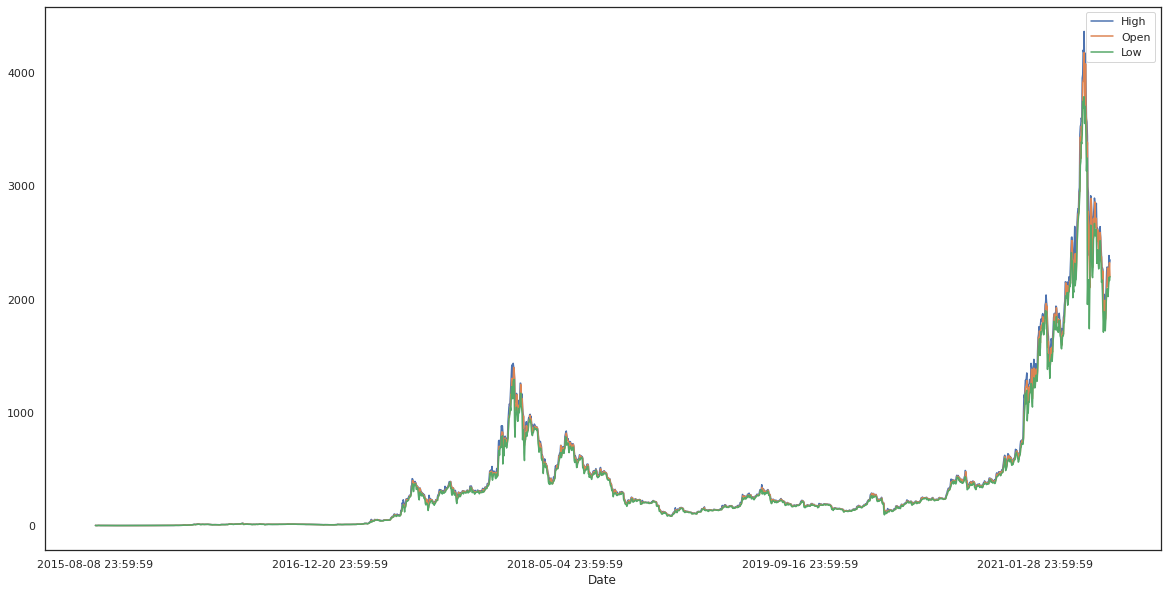

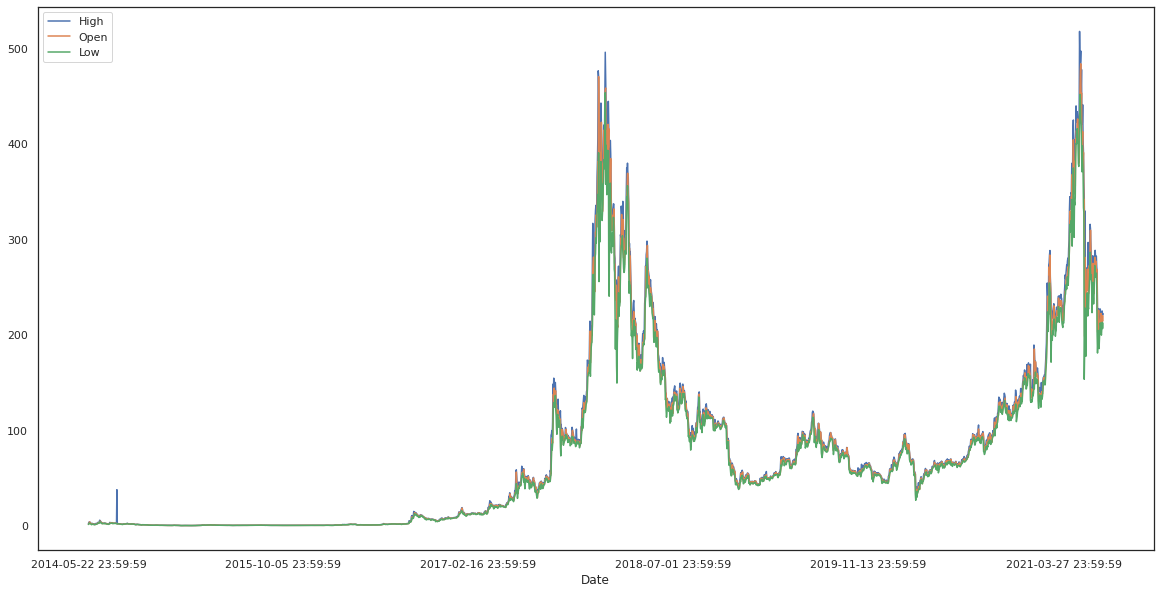

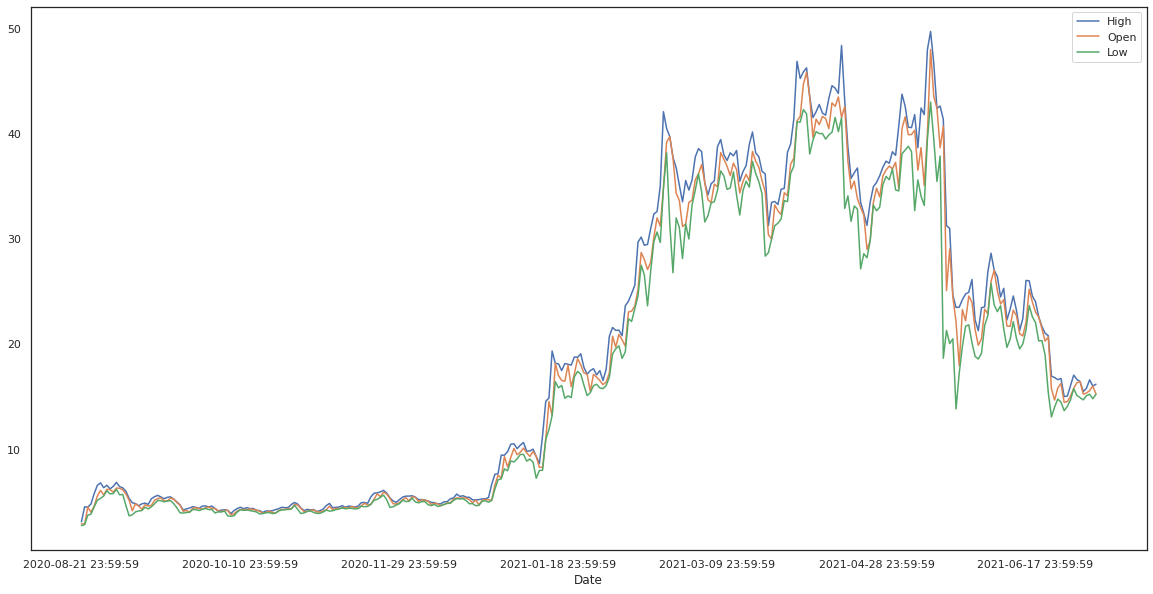

In [ ]:
GroupDF[['High','Open','Low']].plot(legend=True, figsize = (20,10))

In [ ]:
GDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18555 entries, 0 to 319
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        18555 non-null  int64  
 1   Name       18555 non-null  object 
 2   Symbol     18555 non-null  object 
 3   Date       18555 non-null  object 
 4   High       18555 non-null  float64
 5   Low        18555 non-null  float64
 6   Open       18555 non-null  float64
 7   Close      18555 non-null  float64
 8   Volume     18555 non-null  float64
 9   Marketcap  18555 non-null  float64
 10  INC        18555 non-null  float64
 11  IM         18555 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.8+ MB


## Modelado

In [ ]:
#MDF = Model Dataframe
MDF = GDF[['SNo', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Volume', 'Marketcap','INC','IM']]

In [ ]:
GroupModelDF = MDF #.groupby(['Symbol'])['SNo', 'Date', 'High', 'Low', 'Open', 'Volume', 'Marketcap','INC','IM']
GroupModelDF['prevINC'] = GroupModelDF.groupby('Symbol')['INC'].shift().fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
GroupModelDF['IM'].value_counts()

yes    9362
no     9193
Name: IM, dtype: int64

### Test Train

In [ ]:
X = MDF[['SNo', 'High', 'Low', 'Open', 'Volume', 'Marketcap','prevINC']]
y = MDF['IM'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

### Decission Tree

In [ ]:
clf = DecisionTreeClassifier(max_depth = 7, 
                             random_state = 20)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=20)

In [ ]:
clf.predict(X_test)

array(['no', 'yes', 'yes', ..., 'no', 'yes', 'no'], dtype=object)

In [ ]:
clf.score(X_train, y_train)

0.556821681552202

In [ ]:
clf.score(X_test, y_test)

0.5388898868331238

In [ ]:
np.unique(y_train)

array(['no', 'yes'], dtype=object)

### Forest Split

In [ ]:
X = MDF[['SNo', 'High', 'Low', 'Open', 'Volume', 'Marketcap','prevINC']]
y = MDF['INC'].values

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = 0.7)

### Random Forest

In [ ]:
ForReg = RandomForestRegressor(n_estimators = 40, random_state = 20)

In [ ]:
ForReg.fit(X_train2, y_train2) 

RandomForestRegressor(n_estimators=50, random_state=20)

In [ ]:
y_pred = ForReg.predict(X_test2)

In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / np.mean(y_pred))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 22.05 degrees.
Accuracy: 68.22 %.


## Observaciones

Los mercados Crypto son muy volatiles y emocionales, por eso en este caso obtener un resultado mayor a 50% siempre es un buen progreso. Se tiene en cuenta esto en estos procesos y para el futuro se planea aumentar la cantidad de procesos de descripcion.

## Conclusiones

Gracias a estos modelos, podemos tener un poco mas de seguridad en las transacciones y el trading que se desee hacer en los mercados de las criptomonedas. Aunque estoys modelos son bastante simples, son un inicio para proyectos mas complicados.

## Referencias

Base de datos: https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory Marzo 2022
Modelos: https://codingdojo.com
Análisis Matemático: 